# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
aviation_df = pd.read_csv('data/AviationData_Cleaned.csv', encoding='utf-8', low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
small_planes = aviation_df[aviation_df['Total.Passengers'] <= 20].copy()
large_planes = aviation_df[aviation_df['Total.Passengers'] > 20].copy()

print(small_planes.shape)
print(large_planes.shape)

(17006, 37)
(873, 37)


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [4]:
# Summarize safety by Make
def summarize_by_make(df, top_n=15):
    summary = (
        df.groupby('Make')
            .agg(
                Num_Accidents=('Make', 'count'),
                Avg_Frac_Fatal_Serious=('Frac.Fatal.Serious','mean'),
                Destruction_Rate=('destroyed','mean')
            )
            .reset_index()
    )
    # Keep only Makes with >= 10 accidents to ensure statistical robustness
    summary = summary[summary['Num_Accidents'] >= 10]
    # Select top N safest (lowest Avg_Fract_fatal_serious)
    summary = summary.sort_values('Avg_Frac_Fatal_Serious').head(top_n)
    return summary

# Get top 15 safetest Makes
small_makes_summary = summarize_by_make(small_planes)
large_makes_summary = summarize_by_make(large_planes)

print(small_makes_summary)
print(large_makes_summary)

                          Make  Num_Accidents  Avg_Frac_Fatal_Serious  \
21           McDonnell Douglas             55                0.094048   
10                  Bombardier             51                0.098373   
9                       Boeing            714                0.141973   
20                       Maule            215                0.164806   
5                        Aviat            146                0.191781   
6                        Ayres             52                0.215686   
28                     Stinson            129                0.216408   
8                     Bellanca            219                0.222603   
15    Diamond Aircraft Ind Inc             74                0.222973   
26                    Rockwell             58                0.223684   
1                      Aeronca            200                0.225833   
12                    Champion            158                0.260549   
11                      Cessna           7140      

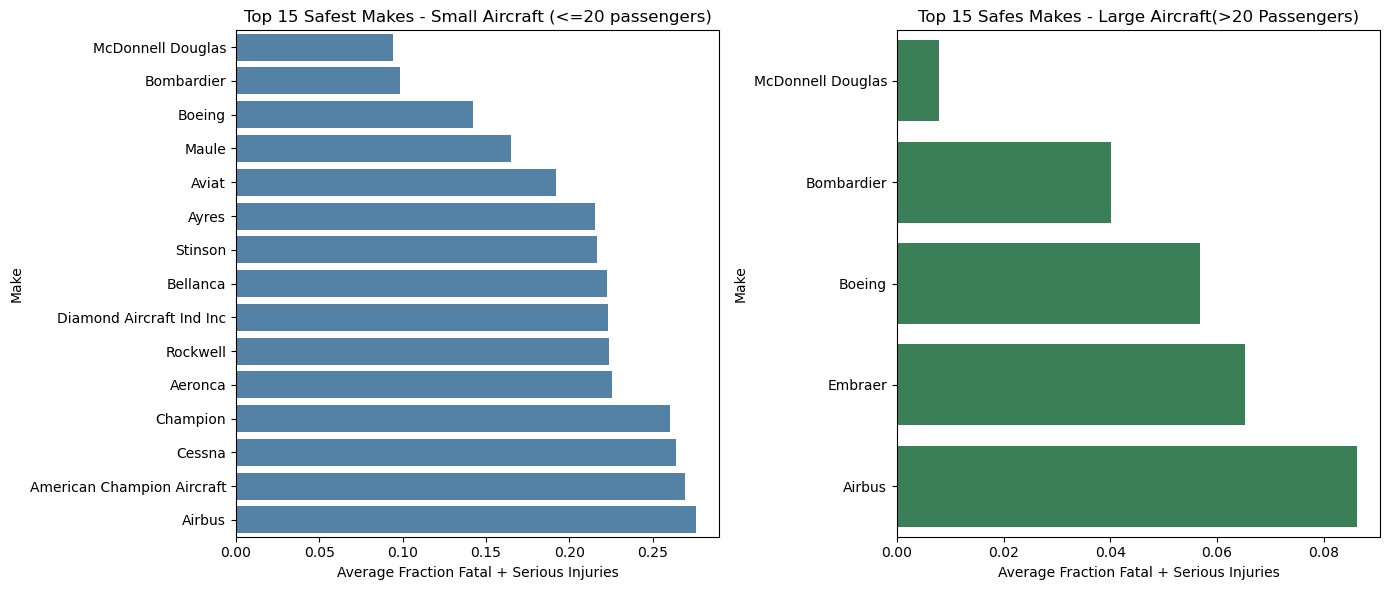

In [5]:
#Plot side-by-side

plt.figure(figsize=(14,6))

# Small planes
plt.subplot(1,2,1)
sns.barplot(
    data=small_makes_summary,
    x='Avg_Frac_Fatal_Serious',
    y='Make',
    color='steelblue'
)
plt.title('Top 15 Safest Makes - Small Aircraft (<=20 passengers)')
plt.xlabel('Average Fraction Fatal + Serious Injuries')
plt.ylabel('Make')

# Large Planes
plt.subplot(1,2,2)
sns.barplot(
    data=large_makes_summary,
    x='Avg_Frac_Fatal_Serious',
    y='Make',
    color='seagreen'
)
plt.title('Top 15 Safes Makes - Large Aircraft(>20 Passengers)')
plt.xlabel('Average Fraction Fatal + Serious Injuries')
plt.ylabel('Make')

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [6]:
#Select the 10 safes small makes
top10_small_makes = small_makes_summary['Make'].head(10).tolist()

top_small_df = small_planes[small_planes['Make'].isin(top10_small_makes)]

top_small_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Report.Status,Publication.Date,Event.Year,Total.Passengers,Frac.Fatal.Serious,destroyed,PlaneType,Engine.Type.Clean,Weather.Condition.Clean,Phase.Clean
33,20001213X28167,Accident,MKC89FA099,1989-04-27,"AINSWORTH, NE",United States,NaN,NaN,ANW,NaN,...,Probable Cause,17-08-2012,1989,3.0,1.000000,True,Maule M-5,Reciprocating,IMC,Climb
51,20001212X23667,Accident,DCA90WA049,1990-07-27,"BHARU, Malaysia",Malaysia,NaN,NaN,NaN,NaN,...,Foreign,07-02-1995,1990,7.0,0.142857,False,McDonnell Douglas DC-10-30,Unknown,Unknown,NaN
66,20001212X17738,Accident,ANC91LA117,1991-08-07,"SEWARD, AK",United States,NaN,NaN,NaN,NaN,...,Probable Cause,19-03-2009,1991,2.0,0.000000,False,Bellanca 7GCBC,Reciprocating,VMC,Maneuvering
71,20001212X18577,Incident,CHI92RA060,1991-12-12,"NAKINA, Canada",Canada,NaN,NaN,NaN,NaN,...,Foreign,05-08-1996,1991,0.0,NaN,False,Boeing B-747-121,Unknown,VMC,NaN
104,20001207X04563,Accident,MIA95WA232,1995-09-15,"BOGOTA, COLOMBIA",Colombia,NaN,NaN,NaN,NaN,...,Foreign,NaN,1995,2.0,0.000000,False,Ayres AY-65,Reciprocating,VMC,NaN


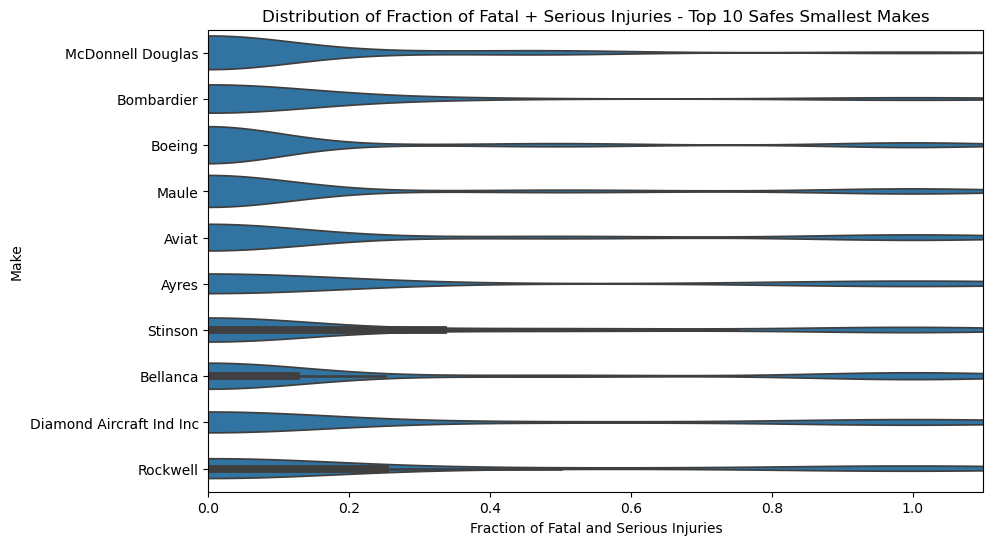

In [7]:
# Violin plot of injury fraction
plt.figure(figsize=(10,6))
sns.violinplot(
    data=top_small_df,
    x='Frac.Fatal.Serious',
    y='Make',
    order=top10_small_makes,
)
plt.title('Distribution of Fraction of Fatal + Serious Injuries - Top 10 Safes Smallest Makes')
plt.xlabel('Fraction of Fatal and Serious Injuries')
plt.ylabel('Make')
plt.xlim(0,top_small_df['Frac.Fatal.Serious'].max()*1.1)
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [8]:
# Select the 10 safest Large Makes
top10_large_makes = large_makes_summary['Make'].head(10).tolist()

# Filter large_planes to those Makes
top_large_df = large_planes[large_planes['Make'].isin(top10_large_makes)]

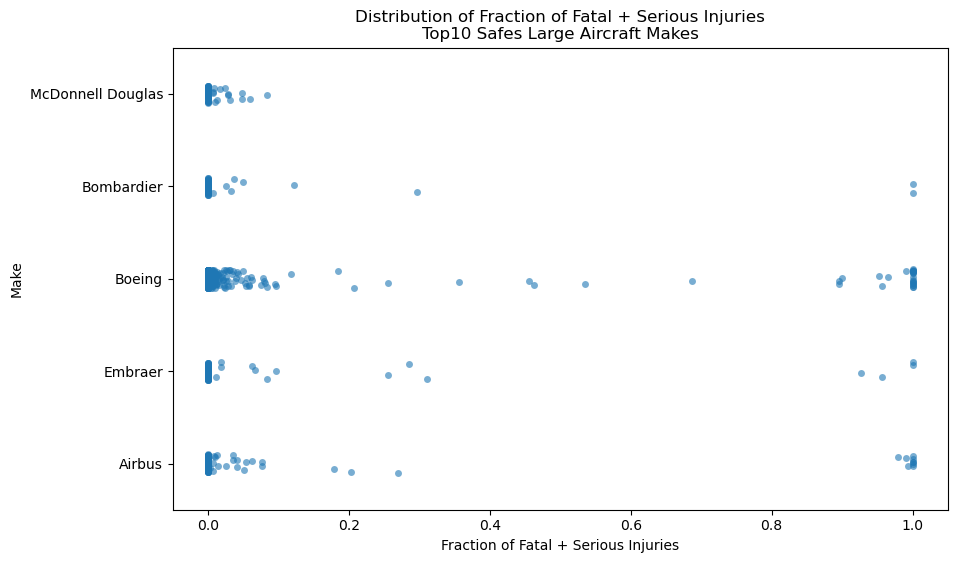

In [9]:
#Stripplot of injury fractions
plt.figure(figsize=(10,6))
sns.stripplot(
    data=top_large_df,
    x='Frac.Fatal.Serious',
    y='Make',
    order=top10_large_makes,
    jitter=True,
    alpha=0.6
)
plt.title('Distribution of Fraction of Fatal + Serious Injuries\nTop10 Safes Large Aircraft Makes')
plt.xlabel('Fraction of Fatal + Serious Injuries')
plt.ylabel('Make')

plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [10]:
# Summarize destruction rate by Make
def summarize_destruction_by_make(df, min_accidents=10, top_n=15):
    summary = (
        df.groupby('Make')
            .agg(
                Num_Accidents=('Make','count'),
                Destruction_Rate=('destroyed','mean')
            )
            .reset_index()
    )
    summary = summary[summary['Num_Accidents'] >= min_accidents]
    summary = summary.sort_values('Destruction_Rate').head(top_n)
    return summary

small_make_destruction = summarize_destruction_by_make(small_planes)
large_make_destruction = summarize_destruction_by_make(large_planes)

small_make_destruction, large_make_destruction

(                          Make  Num_Accidents  Destruction_Rate
 19                    Luscombe            141          0.014184
 28                     Stinson            129          0.023256
 3                       Airbus            125          0.024000
 29                 Taylorcraft             93          0.032258
 1                      Aeronca            200          0.035000
 9                       Boeing            714          0.036415
 4   American Champion Aircraft             52          0.038462
 17                     Ercoupe             52          0.038462
 10                  Bombardier             51          0.039216
 20                       Maule            215          0.041860
 8                     Bellanca            219          0.050228
 15    Diamond Aircraft Ind Inc             74          0.054054
 5                        Aviat            146          0.068493
 21           McDonnell Douglas             55          0.072727
 12                    Ch

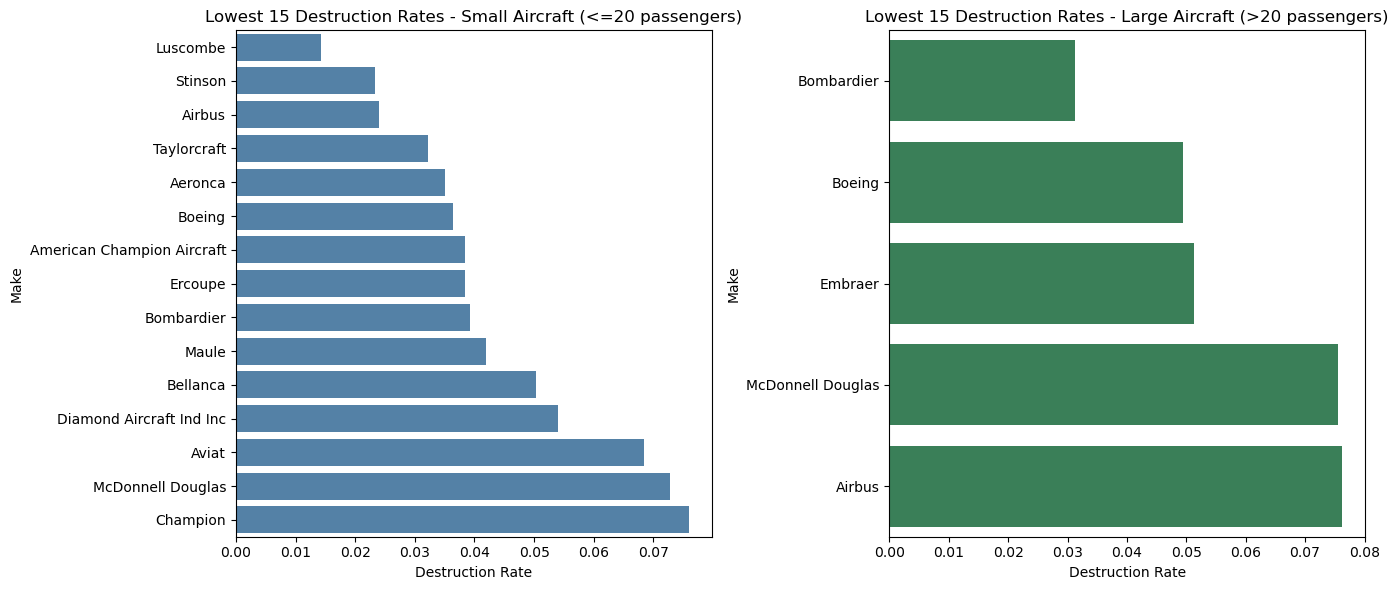

In [11]:
# Plot side-by-side destruction rate

plt.figure(figsize=(14,6))

# Small planes
plt.subplot(1,2,1)
sns.barplot(
    data=small_make_destruction,
    x='Destruction_Rate',
    y='Make',
    color='steelblue'
)
plt.title('Lowest 15 Destruction Rates - Small Aircraft (<=20 passengers)')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')

# Large planes
plt.subplot(1,2,2)
sns.barplot(
    data=large_make_destruction,
    x='Destruction_Rate',
    y='Make',
    color='seagreen'
)
plt.title('Lowest 15 Destruction Rates - Large Aircraft (>20 passengers)')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

#### Recommendations by ManufacturerTop 
- Overall Performer: Bombardier consistently ranks as the most balanced choice, appearing in the top tiers for both low injury fractions and low destruction rates across both size categories.
- Large Aircraft (>20 Passengers): McDonnell Douglas and Bombardier are the safest for occupants, while Bombardier leads in airframe durability (lowest destruction rate).
- Small Aircraft (≤20 Passengers): Luscombe and Stinson exhibit the highest structural integrity, whereas McDonnell Douglas leads in passenger survivability.2. 

#### Statistical & Distribution FindingsInjury Dynamics: 
- Large aircraft show a high density of zero-injury incidents, whereas small aircraft distributions (violin plots) show a much higher frequency of total fatality outcomes.
- Class Comparison: Large commercial-style makes are statistically safer for passengers during an incident than small-scale makes, likely due to more rigorous engineering standards and redundant safety systems.
- Destruction vs. Safety: There is a distinct gap between airframe integrity and passenger safety. For example, while Airbus small aircraft have low destruction rates, they show a higher average injury fraction than Boeing or Bombardier, suggesting the latter protect occupants more effectively during a crash.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

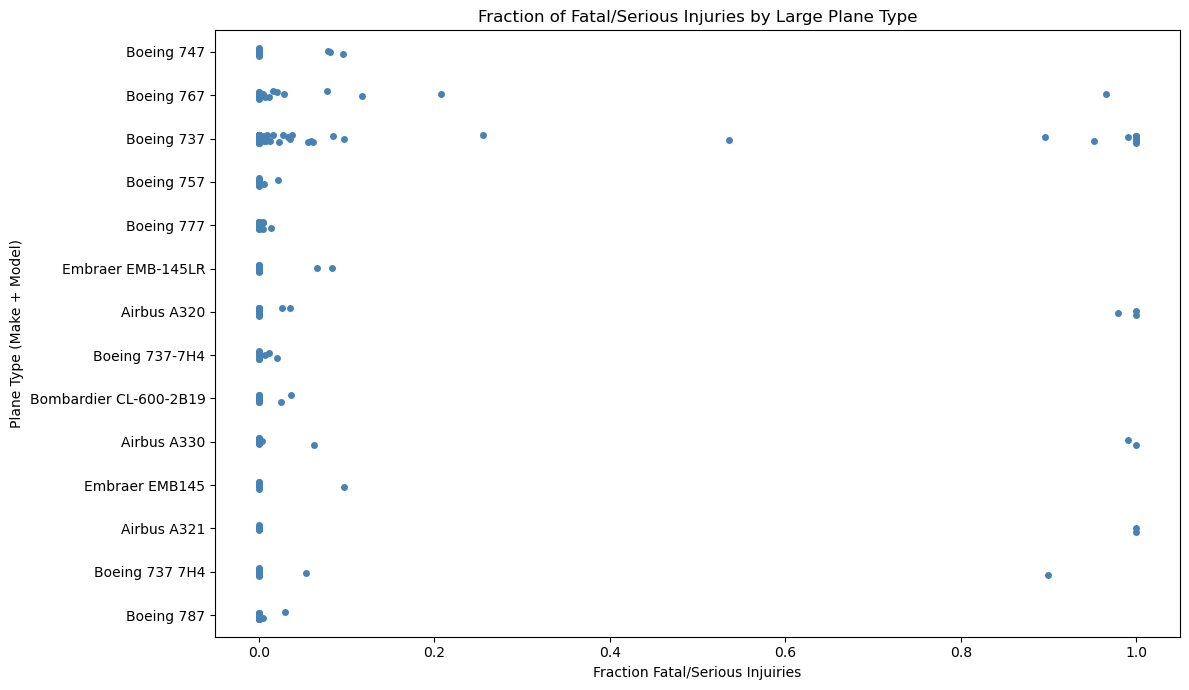

In [12]:
def summarize_plane_types(df, min_accidents=10):
    summary = (
        df.groupby('PlaneType')
            .agg(
                Num_Accidents=('PlaneType', 'count'),
                Avg_Frac_Fatal_Serious=('Frac.Fatal.Serious','mean'),
                Destruction_Rate=('destroyed','mean')
            )
            .reset_index()
    )
    summary = summary[summary['Num_Accidents'] >= min_accidents]

    summary = summary.sort_values('Avg_Frac_Fatal_Serious')

    return summary

large_plane_types = summarize_plane_types(large_planes)

# Filter large_planes to only include PlaneTypes in summary table
filtered_large_planes = large_planes[large_planes['PlaneType'].isin(large_plane_types['PlaneType'])]

plt.figure(figsize=(12, max(6, len(large_plane_types)*0.5)))

sns.stripplot(
    data=filtered_large_planes,
    x='Frac.Fatal.Serious',
    y='PlaneType',
    color='steelblue',
    size=5,
    jitter=True
)

plt.title('Fraction of Fatal/Serious Injuries by Large Plane Type')
plt.xlabel('Fraction Fatal/Serious Injuiries')
plt.ylabel('Plane Type (Make + Model)')
plt.tight_layout()
plt.show()

In [13]:
large_plane_types.sort_values('Avg_Frac_Fatal_Serious')


,PlaneType,Num_Accidents,Avg_Frac_Fatal_Serious,Destruction_Rate
148,Boeing 777,33,0.000821,0.030303
113,Boeing 757,18,0.001473,0.000000
164,Boeing 787,11,0.003058,0.000000
86,Boeing 737-7H4,12,0.003242,0.000000
192,Bombardier CL-600-2B19,15,0.004136,0.000000
239,Embraer EMB145,11,0.008798,0.000000
234,Embraer EMB-145LR,15,0.010000,0.000000
101,Boeing 747,11,0.023161,0.000000
127,Boeing 767,31,0.046963,0.032258
64,Boeing 737 7H4,14,0.068121,0.000000


**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [14]:
small_plane_types = summarize_plane_types(small_planes)

small_plane_types_top_10 = small_plane_types.head(10)

small_plane_types_top_10

,PlaneType,Num_Accidents,Avg_Frac_Fatal_Serious,Destruction_Rate
595,Boeing 787,14,0.000000,0.0
211,Beech 1900D,10,0.000000,0.0
1160,Diamond Aircraft Ind Inc DA 20 C1,11,0.000000,0.0
518,Boeing 737-800,12,0.000000,0.0
583,Boeing 777,43,0.000000,0.0
139,Airbus A321,10,0.000000,0.0
1214,Embraer ERJ190,12,0.000000,0.0
741,Cessna 172SP,12,0.000000,0.0
1299,Maule M-5-210C,11,0.000000,0.0
764,Cessna 180J,28,0.035714,0.0


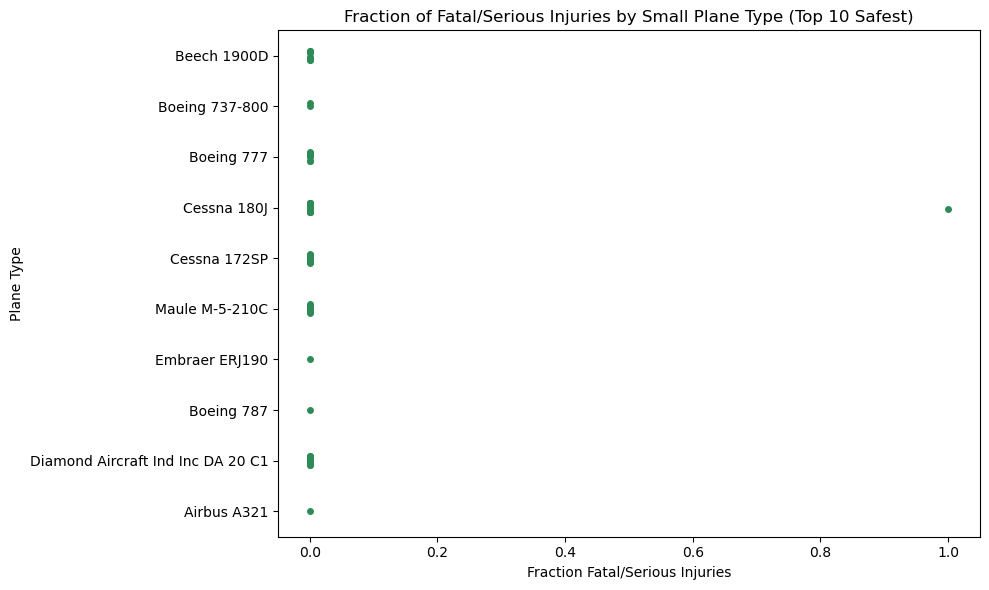

In [15]:
filtered_small_planes = small_planes[small_planes['PlaneType'].isin(small_plane_types_top_10['PlaneType'])]

plt.figure(figsize=(10, max(6, len(small_plane_types_top_10)*0.5)))

sns.stripplot(
    data=filtered_small_planes,
    x='Frac.Fatal.Serious',
    y='PlaneType',
    color='seagreen',
    size=5,
    jitter=True
)
plt.title('Fraction of Fatal/Serious Injuries by Small Plane Type (Top 10 Safest)')
plt.xlabel('Fraction Fatal/Serious Injuries')
plt.ylabel('Plane Type')
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

#### Small Plane Type (Top 10 Safest)
- Most models (e.g., Beech 1900D, Boeing 787, Airbus A321) show a heavy cluster at 0.0. This means in the vast majority of recorded incidents, there were zero serious injuries.
- The Cessna 180J is the only model in this "safest" group with a data point at 1.0. This indicates a "binary" safety profile: it’s usually perfectly safe, but when an accident happens, it can be total.

#### Large Plane Type
- You see a high density at 0.0 (minor incidents) and a smaller cluster at 1.0 (hull losses/catastrophes).
- Unlike the small planes, models like the Boeing 737 and 767 show points between 0.2 and 0.6.
- Because large planes carry hundreds of people, localized incidents (like severe turbulence or a contained fire) can seriously injure a portion of the passengers without being a total loss.
- The Boeing 777 and 787 show almost no points above 0.1, highlighting their reputation as some of the safest long-haul aircraft in history.

#### Key Takeaway for your Portfolio
The data suggests that for large aircraft, "safety" isn't just about avoiding crashes—it's about the plane's ability to protect the majority of passengers even when something goes wrong (the middle-range values).

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [16]:
pd.set_option('display.max_columns', None)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Total.Passengers,Frac.Fatal.Serious,destroyed,PlaneType,Engine.Type.Clean,Weather.Condition.Clean,Phase.Clean
0,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,Incident,Minor,Airplane,9VSQQ,Boeing,747,No,4.0,Turbo Fan,Part 129: Foreign,NaN,0.0,0.0,0.0,588.0,VMC,Taxi,Probable Cause,04-12-2014,1983,588.0,0.0,False,Boeing 747,Turbofan,VMC,Taxi
1,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N9600W,Piper,PA-28-140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,1.0,0.0,0.0,IMC,Cruise,Probable Cause,02-05-2011,1983,2.0,1.0,True,Piper PA-28-140,Reciprocating,IMC,Cruise
2,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,Fatal(1),Unknown,Airplane,N927BA,De Havilland,DHC-6,No,2.0,Turbo Prop,Part 91: General Aviation,Skydiving,1.0,0.0,0.0,4.0,VMC,Standing,Probable Cause,17-10-2016,1983,5.0,0.2,False,De Havilland DHC-6,Turboprop,VMC,Standing
3,20001214X45013,Incident,CHI84IA041,1983-11-08,"CHICAGO, IL",United States,NaN,NaN,ORD,O'HARE,Incident,Minor,Airplane,N898AA,Boeing,727-200,No,3.0,Turbo Fan,Part 121: Air Carrier,Unknown,0.0,0.0,0.0,100.0,VMC,Taxi,Probable Cause,11-06-2018,1983,100.0,0.0,False,Boeing 727-200,Turbofan,VMC,Taxi
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N1882D,Beech,C35,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,Climb,Probable Cause,05-05-2011,1983,1.0,0.0,False,Beech C35,Reciprocating,VMC,Climb


In [17]:
# Categorize plane size
aviation_df['PlaneSize'] = aviation_df['Total.Passengers'].apply(lambda x: 'Small' if x <= 20 else 'Large')
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Total.Passengers,Frac.Fatal.Serious,destroyed,PlaneType,Engine.Type.Clean,Weather.Condition.Clean,Phase.Clean,PlaneSize
0,20001214X42478,Incident,LAX83IA149A,1983-03-18,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES INTL,Incident,Minor,Airplane,9VSQQ,Boeing,747,No,4.0,Turbo Fan,Part 129: Foreign,NaN,0.0,0.0,0.0,588.0,VMC,Taxi,Probable Cause,04-12-2014,1983,588.0,0.0,False,Boeing 747,Turbofan,VMC,Taxi,Large
1,20001214X42331,Accident,ATL83FA140,1983-03-20,"CROSSVILLE, TN",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,Airplane,N9600W,Piper,PA-28-140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,1.0,0.0,0.0,IMC,Cruise,Probable Cause,02-05-2011,1983,2.0,1.0,True,Piper PA-28-140,Reciprocating,IMC,Cruise,Small
2,20001214X42672,Accident,FTW83LA177,1983-04-02,"MCKINNEY, TX",United States,NaN,NaN,TX05,AERO COUNTRY,Fatal(1),Unknown,Airplane,N927BA,De Havilland,DHC-6,No,2.0,Turbo Prop,Part 91: General Aviation,Skydiving,1.0,0.0,0.0,4.0,VMC,Standing,Probable Cause,17-10-2016,1983,5.0,0.2,False,De Havilland DHC-6,Turboprop,VMC,Standing,Small
3,20001214X45013,Incident,CHI84IA041,1983-11-08,"CHICAGO, IL",United States,NaN,NaN,ORD,O'HARE,Incident,Minor,Airplane,N898AA,Boeing,727-200,No,3.0,Turbo Fan,Part 121: Air Carrier,Unknown,0.0,0.0,0.0,100.0,VMC,Taxi,Probable Cause,11-06-2018,1983,100.0,0.0,False,Boeing 727-200,Turbofan,VMC,Taxi,Large
4,20001214X45188,Accident,NYC84LA028,1983-11-13,"MARTHA'S VINEYARD, MA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N1882D,Beech,C35,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,Climb,Probable Cause,05-05-2011,1983,1.0,0.0,False,Beech C35,Reciprocating,VMC,Climb,Small


In [18]:
#Compare weather impact for small vs large planes
weather_size_summary = aviation_df.groupby(['Weather.Condition.Clean', 'PlaneSize']).agg(
    Num_Accidents=('Weather.Condition.Clean', 'count'),
    Avg_Frac_Fatal_Serious=('Frac.Fatal.Serious', 'mean'),
    Avg_Destruction_Rate=('destroyed','mean')
).reset_index()

weather_size_summary

,Weather.Condition.Clean,PlaneSize,Num_Accidents,Avg_Frac_Fatal_Serious,Avg_Destruction_Rate
0,IMC,Large,72,0.111981,0.083333
1,IMC,Small,833,0.673153,0.370948
2,Unknown,Large,462,0.074444,0.077922
3,Unknown,Small,2217,0.527214,0.208841
4,VMC,Large,339,0.027048,0.017699
5,VMC,Small,13956,0.238112,0.072155


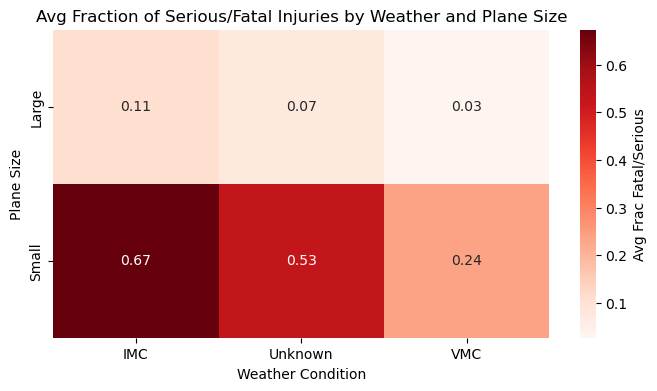

In [19]:
heatmap_data = weather_size_summary.pivot(
    index='PlaneSize', 
    columns='Weather.Condition.Clean', 
    values='Avg_Frac_Fatal_Serious'
)
plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_data, 
    annot=True,        # show values in the cells
    fmt=".2f",         # format numbers
    cmap="Reds",       # color map
    cbar_kws={'label': 'Avg Frac Fatal/Serious'}
)
plt.title('Avg Fraction of Serious/Fatal Injuries by Weather and Plane Size')
plt.ylabel('Plane Size')
plt.xlabel('Weather Condition')
plt.show()

Weather Condition and Plane Size Analysis

- Small planes:
    - Most accidents occur in VMC (13,956), with a moderate serious/fatal fraction (0.24) and low destruction (0.072).
    - In IMC, accidents are fewer (833) but much more severe: serious/fatal fraction 0.67, destruction 0.37.
    - Small planes are highly sensitive to poor visibility conditions.

- Large planes:
    - Most accidents happen in VMC (339), with very low serious/fatal fraction (0.027) and destruction rate (0.018).
    - In IMC, accidents are rare (72) but more severe: serious/fatal fraction 0.11, destruction 0.083.
    - Large planes handle poor weather better due to stronger design, systems, and professional operation.

Key takeaways:
- Weather affects accident severity more than count, especially for small planes.
- Small planes show a dramatic increase in severity in IMC.
- Large planes remain generally safe across weather conditions, though IMC accidents are slightly more severe.


In [20]:
phase_summary = aviation_df.groupby(['Phase.Clean', 'PlaneSize']).agg(
    Num_Accidents=('Phase.Clean', 'count'),
    Avg_Frac_Fatal_Serious=('Frac.Fatal.Serious', 'mean'),
    Avg_Destruction_Rate=('destroyed', 'mean')
).reset_index()

phase_summary

,Phase.Clean,PlaneSize,Num_Accidents,Avg_Frac_Fatal_Serious,Avg_Destruction_Rate
0,Climb,Large,5,0.003149,0.000000
1,Climb,Small,47,0.351064,0.319149
2,Cruise,Large,5,0.202892,0.200000
3,Cruise,Small,233,0.182364,0.133047
4,Descent,Large,4,0.004386,0.000000
5,Descent,Small,58,0.236958,0.172414
6,Landing,Large,10,0.102758,0.200000
7,Landing,Small,1391,0.043110,0.028756
8,Maneuvering,Large,1,0.043478,0.000000
9,Maneuvering,Small,126,0.361206,0.293651


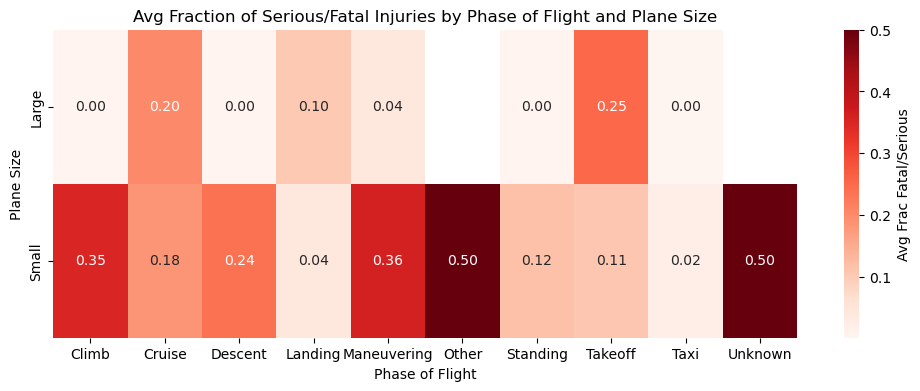

In [21]:
heatmap_phase = phase_summary.pivot(
    index='PlaneSize',
    columns='Phase.Clean',
    values='Avg_Frac_Fatal_Serious'
)

plt.figure(figsize=(12,4))
sns.heatmap(
    heatmap_phase,
    annot=True,      # Show numbers in cells
    fmt=".2f",
    cmap="Reds",     # Color intensity indicates severity
    cbar_kws={'label':'Avg Frac Fatal/Serious'}
)
plt.title('Avg Fraction of Serious/Fatal Injuries by Phase of Flight and Plane Size')
plt.ylabel('Plane Size')
plt.xlabel('Phase of Flight')
plt.show()

#### Phase of Flight Analysis

- Small planes:
    - Most vulnerable during Maneuvering (0.36), Climb (0.35), and Cruise (0.18) – higher serious/fatal fractions.
    - Takeoff (0.11) and Landing (0.043) are more common but less severe.
    - Active flight phases pose higher risk per accident, even if accidents are fewer than Takeoff/Landing.

- Large planes:
    - Severity remains very low across all phases (max ~0.25 during Takeoff/Cruise).
    - Climb, Cruise, Descent, Takeoff, Landing, Taxi all show fractions <0.25, indicating strong resilience.
    - Phase of flight has minimal effect on large-plane safety.

- Key takeaways:
    - Phase of flight affects severity more than accident count, especially for small planes.
    - Small planes are most vulnerable during active flight phases: Maneuvering, Climb, Cruise.
    - Large planes remain safe across all observed phases.

Heatmaps or color-coded charts are useful to highlight high-risk small-plane phases (red) versus low-risk large-plane phases (light).